# Galactic Plane Survey Design Configurations



In [1]:
from os import path, getcwd
from sys import path as pythonpath
pythonpath.append(path.join(getcwd(), '..'))
from astropy.table import Table, Column, vstack
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import config_utils
import regions
import plot_metric_results
import visualization_utils
import numpy as np
from astropy import units as u 
from mw_plot import MWSkyMap

## Set up

In [2]:
sim_config = config_utils.read_config(path.join(getcwd(), '..', 'config', 'sim_config.json'))

In [3]:
survey_regions = regions.load_regions_from_file(sim_config, path.join(sim_config['root_dir'], 'region_data', 'rgps_survey_regions.json'))

In [4]:
science_cases = config_utils.read_config(path.join(getcwd(), '..', 'config', 'rgps_science_cases.json'))

science_categories = []
for author, info in science_cases.items():
    if info['ready_for_use'] and info['category'] not in science_categories:
        science_categories.append(info['category'])

## Plot survey footprints

In [5]:
survey_name = 'wide_area' 
optic = 'F213'

In [6]:
# Combine all regions for this survey design option and filter 
region_list = []
params = survey_regions[survey_name]
if optic in params.keys():
    for region in params[optic]:
        region_list.append(region)
        print('Including region ' + region.name)
        
    r_merge = regions.combine_regions(region_list)
else:
    print(optic + ' not found in regions for survey ' + survey_name)

Including region Galactic_Plane1
Including region Galactic_Plane2
Including region Serpens
Including region Galactic_Bulge1
Including region Galactic_Bulge2


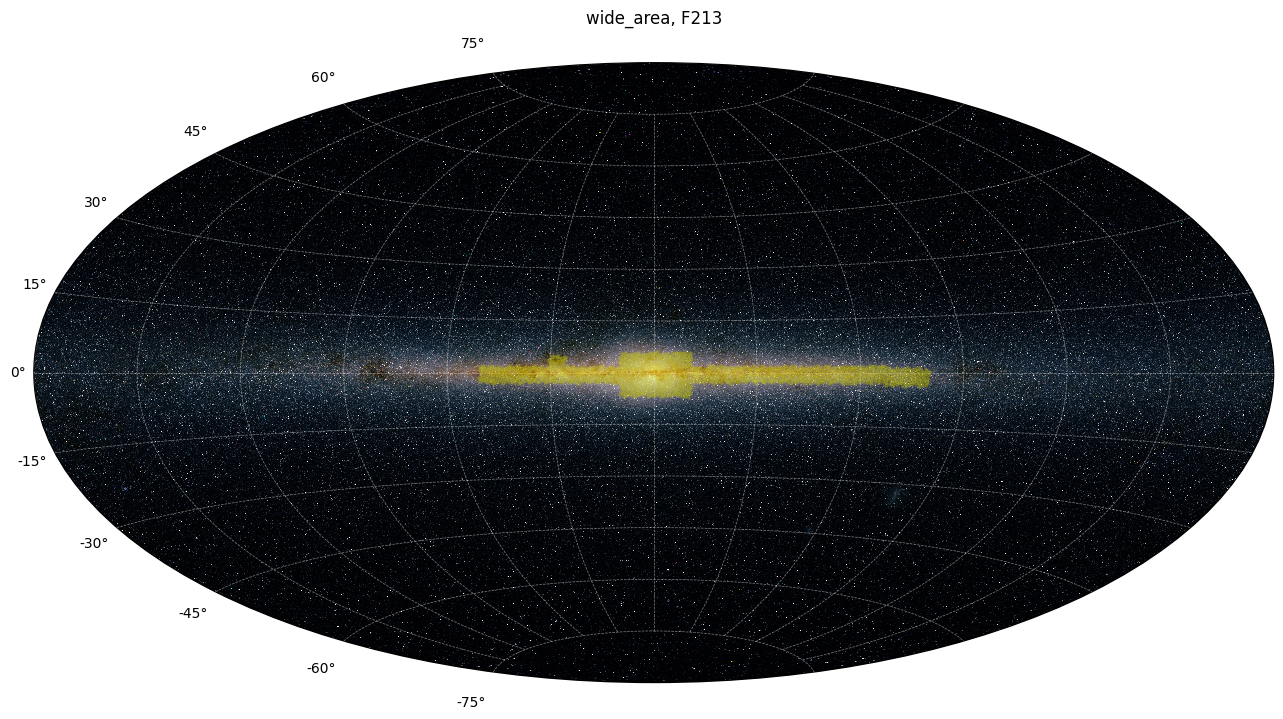

In [8]:
mw1 = r_merge.sky_plot(
    title = survey_name + ', ' + optic, 
    plot_color='y',
    plot_alpha=0.3
)